**EPL Football data:** [in this repo]()

In [1]:
# import necessary libraries
##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('twilight_shifted_r')
sns.set_context('notebook')

In [2]:
df = pd.read_csv("../csv files/epl_data.csv", parse_dates=['Date'])
df.head(3)

,Date,HomeTeam,AwayTeam,HomeTeam_n,AwayTeam_n,FTHG,FTAG,B365H,B365D,B365A
0,2010-08-14,Aston Villa,West Ham,25.0,11.0,3.0,0.0,2.00,3.30,4.0
1,2010-08-14,Blackburn,Everton,33.0,14.0,1.0,0.0,2.88,3.25,2.5
2,2010-08-14,Bolton,Fulham,3.0,29.0,0.0,0.0,2.20,3.30,3.4


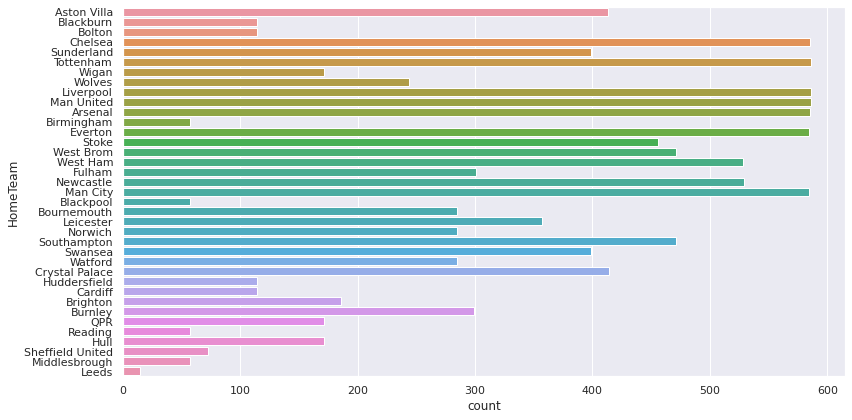

In [3]:
# A plot of how much the teams played from home
##
plt.figure(figsize=(12,6))
sns.countplot(y='HomeTeam', data=df)
plt.tight_layout()

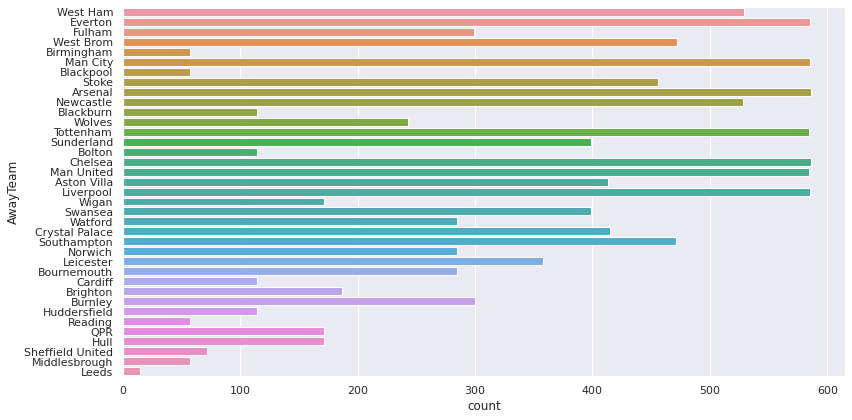

In [4]:
# A plot of how much the teams played from away
##
plt.figure(figsize=(12,6))
sns.countplot(y='AwayTeam', data=df)
plt.tight_layout()

In [5]:
# new column 'result' to show home-win, draw or away-win
##
df['result'] = np.nan

for i, team in enumerate(df.HomeTeam):
    if df.loc[i, 'FTHG'] > df.loc[i, 'FTAG']:
        df.loc[i, 'result'] = 'Home Win'
    elif df.loc[i, 'FTHG'] == df.loc[i, 'FTAG']:
        df.loc[i, 'result'] = 'Draw'
    elif df.loc[i, 'FTHG'] < df.loc[i, 'FTAG']:
        df.loc[i, 'result'] = 'Away Win'
    else:
        pass
    
df.head()

,Date,HomeTeam,AwayTeam,HomeTeam_n,AwayTeam_n,FTHG,FTAG,B365H,B365D,B365A,result
0,2010-08-14,Aston Villa,West Ham,25.0,11.0,3.0,0.0,2.00,3.30,4.0,Home Win
1,2010-08-14,Blackburn,Everton,33.0,14.0,1.0,0.0,2.88,3.25,2.5,Home Win
2,2010-08-14,Bolton,Fulham,3.0,29.0,0.0,0.0,2.20,3.30,3.4,Draw
3,2010-08-14,Chelsea,West Brom,31.0,21.0,6.0,0.0,1.17,7.00,17.0,Home Win
4,2010-08-14,Sunderland,Birmingham,5.0,20.0,2.0,2.0,2.10,3.30,3.6,Draw


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='result', ylabel='count'>

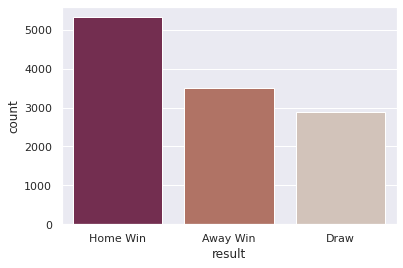

In [6]:
# distribution of results
##
sns.countplot('result', data=df, order=['Home Win', 'Away Win', 'Draw'])

<AxesSubplot:xlabel='count', ylabel='HomeTeam'>

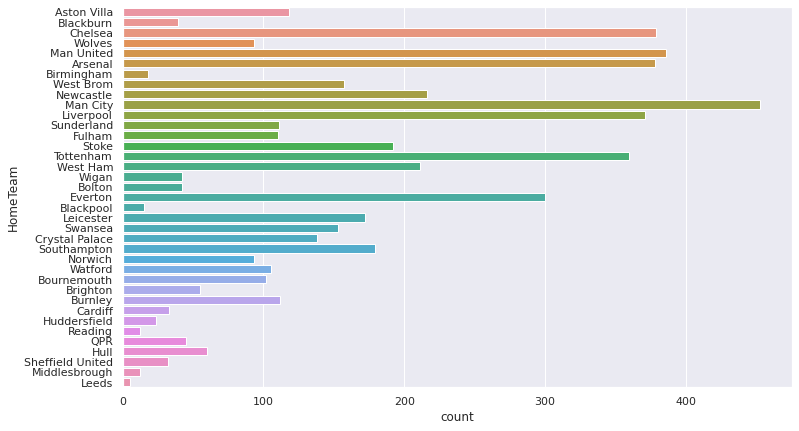

In [7]:
# plot to show home wins for every team
##
plt.figure(figsize=(12,7))
sns.countplot(y='HomeTeam',data=df[df.result == 'Home Win'])

Man City has the most Home Wins  
Leeds has the least

<AxesSubplot:xlabel='count', ylabel='AwayTeam'>

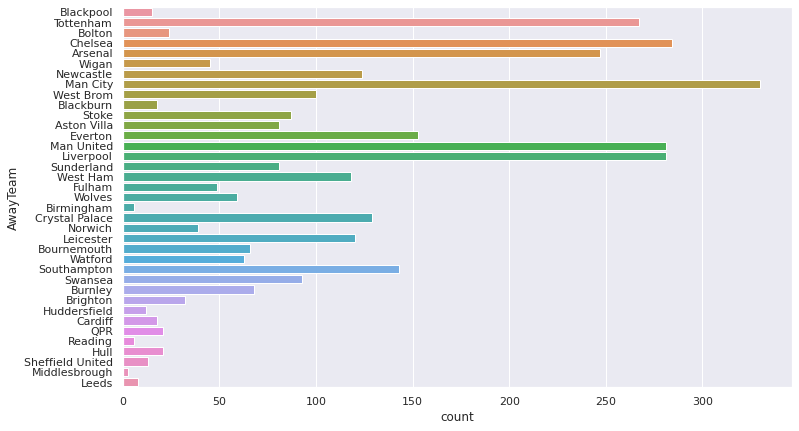

In [8]:
# plot to show Away wins for every team
##
plt.figure(figsize=(12,7))
sns.countplot(y='AwayTeam',data=df[df.result == 'Away Win'])

Man City has the most Away Wins  
Middlesbrough has the least

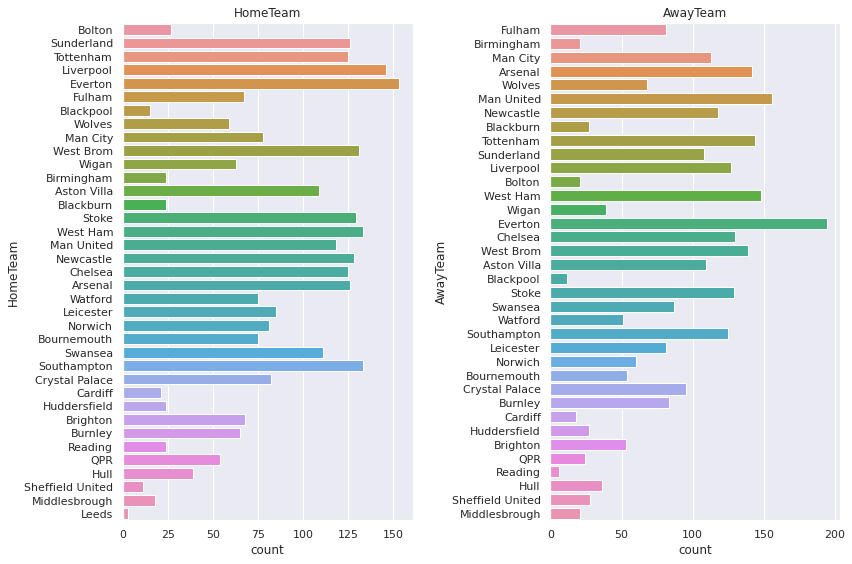

In [9]:
# plot to show draws
##
fig, ax = plt.subplots(1, 2, figsize=(12,8))
sns.countplot(y='HomeTeam', data=df[df.result == 'Draw'], ax=ax[0])
ax[0].set_title("HomeTeam")
sns.countplot(y='AwayTeam', data=df[df.result == 'Draw'], ax=ax[1])
ax[1].set_title("AwayTeam")

plt.tight_layout()

Everton has most Draws from Home  
Leeds has the least  

Everton also has the most Draws from Away  
Reading has the least



In [10]:
# preview which teams the above teams(esp. Everton) have Drawn with
##
df[(df.HomeTeam == 'Everton') & (df.result == 'Draw')]

,Date,HomeTeam,AwayTeam,HomeTeam_n,AwayTeam_n,FTHG,FTAG,B365H,B365D,B365A,result
12,2010-08-21,Everton,Wolves,14.0,17.0,1.0,1.0,1.50,4.00,7.00,Draw
31,2010-11-09,Everton,Man United,14.0,1.0,3.0,3.0,4.20,3.40,1.91,Draw
114,2010-10-11,Everton,Bolton,14.0,3.0,1.0,1.0,1.62,3.75,6.00,Draw
160,2010-11-12,Everton,Wigan,14.0,18.0,0.0,0.0,1.40,4.50,9.00,Draw
224,2011-01-22,Everton,West Ham,14.0,11.0,2.0,2.0,1.50,4.00,7.50,Draw
...,...,...,...,...,...,...,...,...,...,...,...
11461,2014-03-12,Everton,Hull,14.0,26.0,1.0,1.0,1.53,4.33,7.00,Draw
11526,2015-10-01,Everton,Man City,14.0,34.0,1.0,1.0,4.50,3.75,1.85,Draw
11542,2015-01-19,Everton,West Brom,14.0,21.0,0.0,0.0,1.85,3.60,4.75,Draw
11554,2015-07-02,Everton,Liverpool,14.0,30.0,0.0,0.0,3.40,3.40,2.30,Draw


Text(0.5, 1.0, 'Teams that did Draw with Everton(Home)')

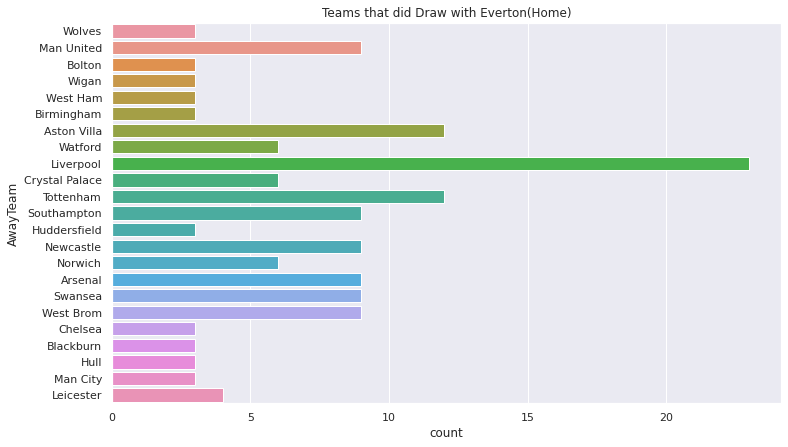

In [11]:
plt.figure(figsize=(12,7))
sns.countplot(y='AwayTeam', data=df[(df.HomeTeam == 'Everton') & (df.result == 'Draw')])
plt.title("Teams that did Draw with Everton(Home)")

Liverpool did Draw the most with Everton while Everton was the Home Team


Text(0.5, 1.0, 'Teams that did Draw with Everton(Away)')

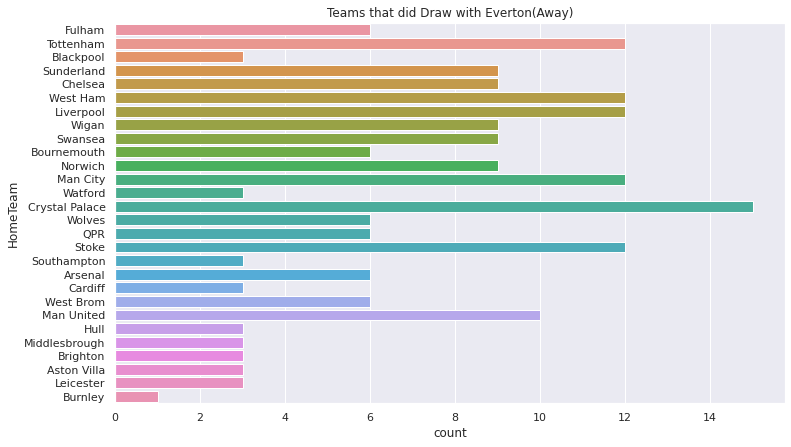

In [12]:
plt.figure(figsize=(12,7))
sns.countplot(y='HomeTeam', data=df[(df.AwayTeam == 'Everton') & (df.result == 'Draw')])
plt.title("Teams that did Draw with Everton(Away)")

Crystal Palace did Draw the most with Everton while Everton was the Away Team

<AxesSubplot:>

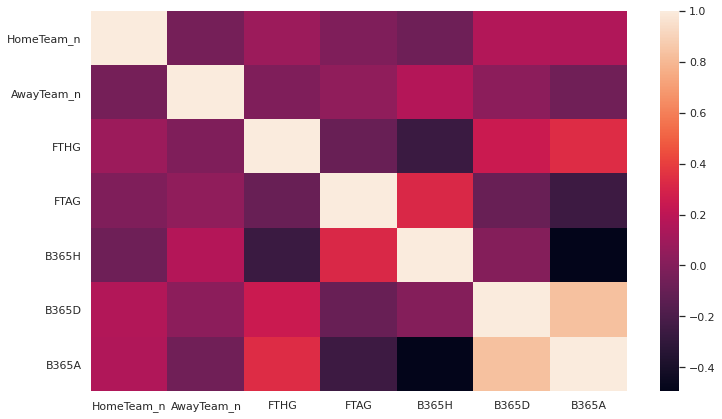

In [13]:
# heatmap
##
plt.figure(figsize=(12,7))
sns.heatmap(df.corr())

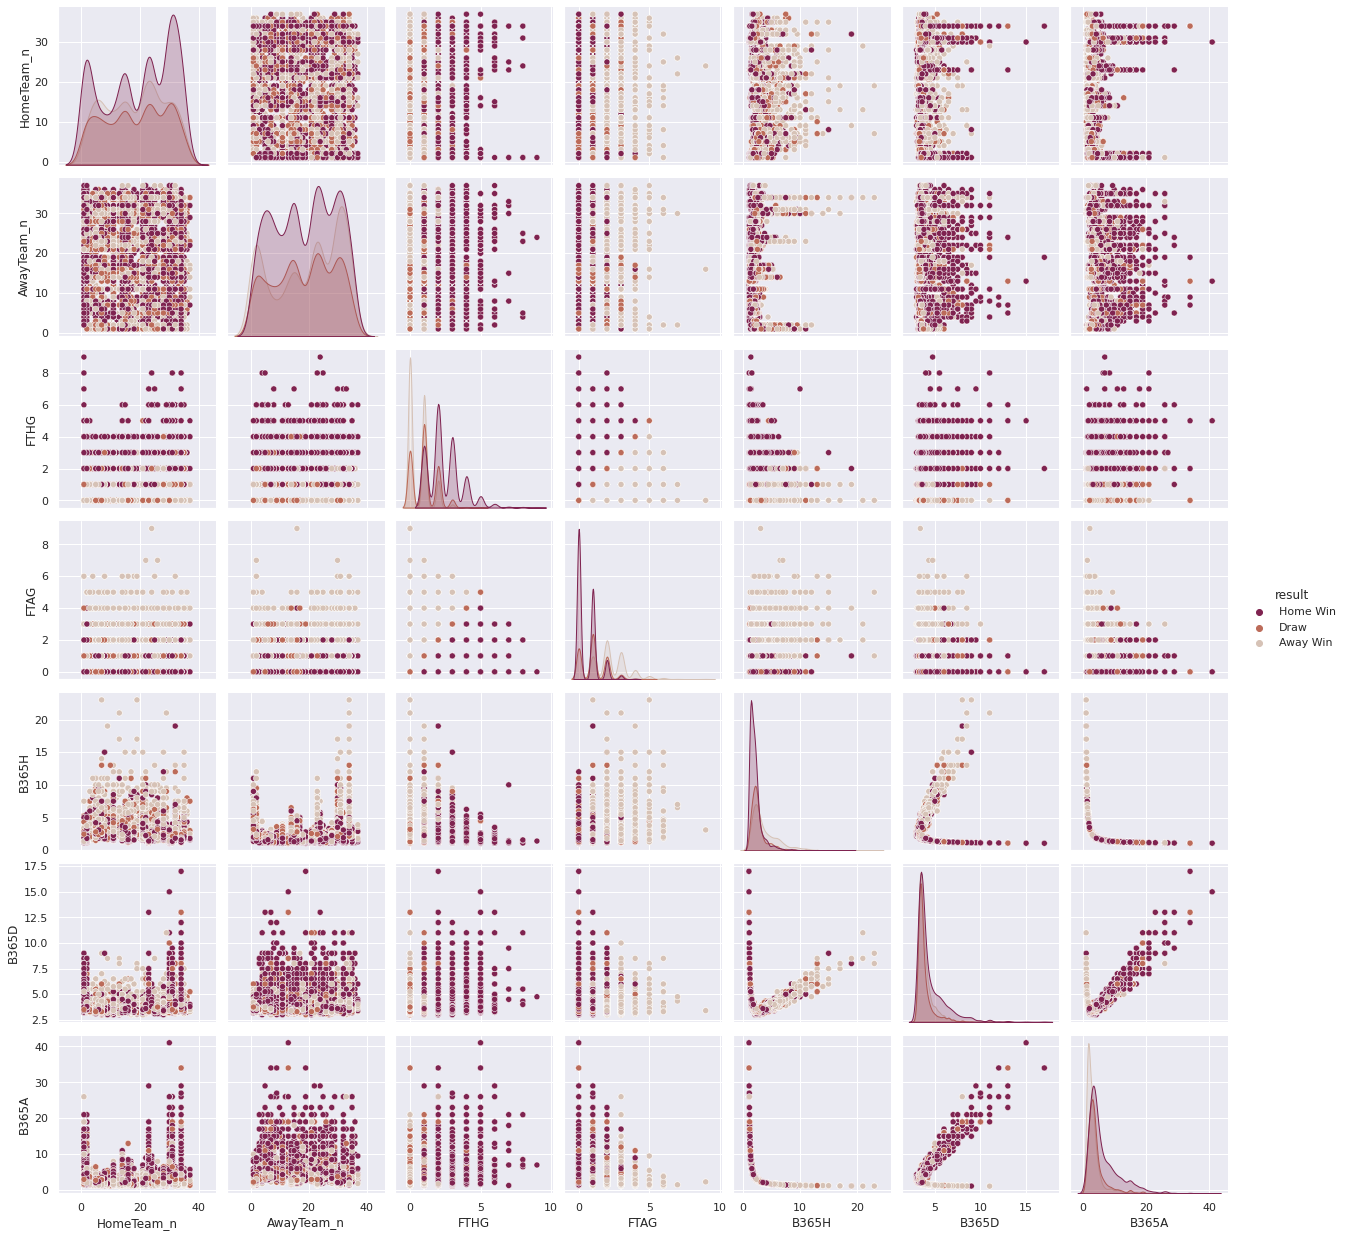

In [14]:
# pairplot
##
sns.pairplot(df, hue='result')

-----
-----

In [16]:
# the last dataframe for use in modeling
##
last_df = df[['Date', 'HomeTeam', 'AwayTeam', 'HomeTeam_n', 'AwayTeam_n', 'B365H', 'B365D', 'B365A', 'result']]

# sort by date
##
last_df = last_df.sort_values('Date')

last_df.reset_index(drop=True, inplace=True)

#last_df.to_csv("csv files/lastdf.csv", index=False)

-----
-----

## **EDA with Feature Engneering**

In [17]:
#df = pd.read_csv("csv files/lastdf.csv", parse_dates=['Date'])
df = last_df[:]

df.sort_values('Date')
df.reset_index(drop=True, inplace=True)

In [18]:
print(f"size of df: {df.size}\nshape of df: {df.shape}")
display(df.head(3))

size of df: 105327
shape of df: (11703, 9)


,Date,HomeTeam,AwayTeam,HomeTeam_n,AwayTeam_n,B365H,B365D,B365A,result
0,2010-01-11,Blackpool,West Brom,12.0,21.0,2.9,3.25,2.5,Home Win
1,2010-01-11,Blackpool,West Brom,12.0,21.0,2.9,3.25,2.5,Home Win
2,2010-01-11,Blackpool,West Brom,12.0,21.0,2.9,3.25,2.5,Home Win


In [19]:
# sub dataframes
##
homewins = df[df.result == 'Home Win']
draws = df[df.result == 'Draw']
awaywins = df[df.result == 'Away Win']

# Home wins

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

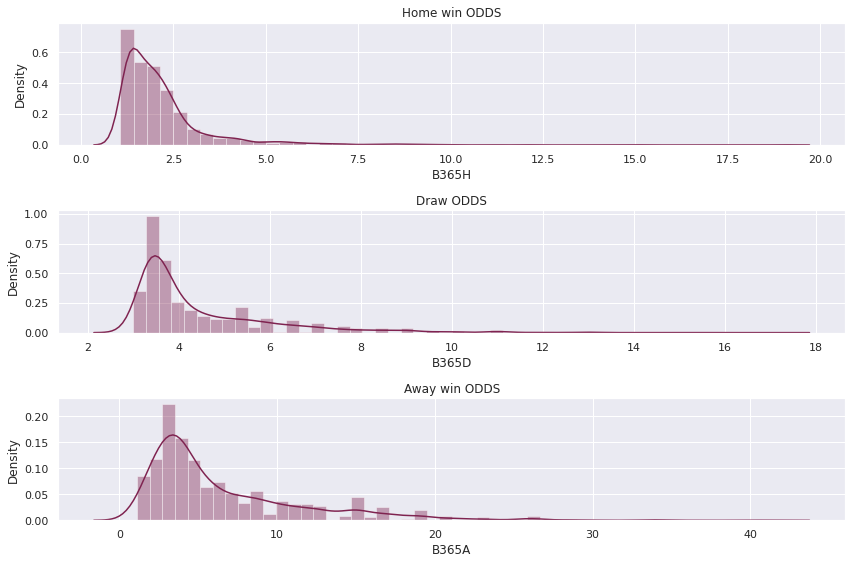

In [20]:
# distribution of odds in home wins
##
fig, ax = plt.subplots(3,1, figsize=(12,8))
sns.distplot(homewins['B365H'], ax=ax[0])
ax[0].set_title("Home win ODDS")

sns.distplot(homewins['B365D'], ax=ax[1])
ax[1].set_title("Draw ODDS")

sns.distplot(homewins['B365A'], ax=ax[2])
ax[2].set_title("Away win ODDS")

plt.tight_layout()

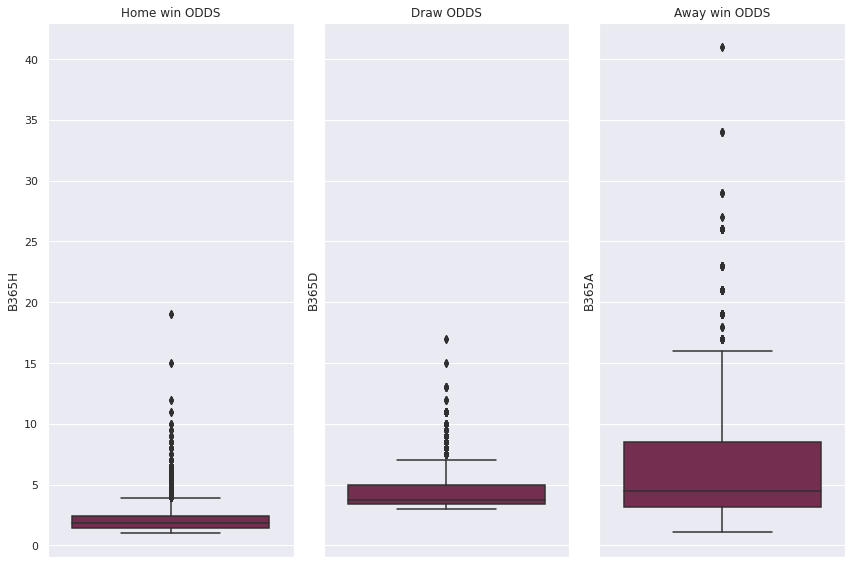

In [21]:
# boxplots
##
fig, ax = plt.subplots(1,3, sharey=True, figsize=(12,8))
sns.boxplot(y=homewins['B365H'], ax=ax[0])
ax[0].set_title("Home win ODDS")

sns.boxplot(y=homewins['B365D'], ax=ax[1])
ax[1].set_title("Draw ODDS")

sns.boxplot(y=homewins['B365A'], ax=ax[2])
ax[2].set_title("Away win ODDS")

plt.tight_layout()

The plot makes sense. Home win odds were the minimal because home win probabilities were high.

In [22]:
# home wins where home win odds awarded were not the least (as should be expected)
##
homewins[(homewins.B365H >= homewins.B365D) | (homewins.B365H >= homewins.B365A)]

,Date,HomeTeam,AwayTeam,HomeTeam_n,AwayTeam_n,B365H,B365D,B365A,result
0,2010-01-11,Blackpool,West Brom,12.0,21.0,2.90,3.25,2.50,Home Win
1,2010-01-11,Blackpool,West Brom,12.0,21.0,2.90,3.25,2.50,Home Win
2,2010-01-11,Blackpool,West Brom,12.0,21.0,2.90,3.25,2.50,Home Win
61,2010-06-11,Bolton,Tottenham,3.0,2.0,3.00,3.30,2.40,Home Win
70,2010-06-11,Bolton,Tottenham,3.0,2.0,3.00,3.30,2.40,Home Win
...,...,...,...,...,...,...,...,...,...
11672,2021-01-31,Brighton,Tottenham,9.0,2.0,3.20,3.40,2.25,Home Win
11678,2021-02-02,Wolves,Arsenal,17.0,23.0,3.60,3.30,2.10,Home Win
11688,2021-04-01,Southampton,Liverpool,24.0,30.0,5.00,4.33,1.61,Home Win
11692,2021-06-02,Newcastle,Southampton,32.0,24.0,3.00,3.30,2.40,Home Win


In [23]:
286 / len(homewins) * 100

5.372910013150479

Home wins where home win odds awarded were not the least are 5.37%  
Most of these odds are actually the hirest by far  
Also notice how if they are not close to the other two, they are far away  
(this is one of the reasons our model might not be doing well)  

**Remedy:**  
Add a new feature(to the overall dataframe) to equalize these specific odds to draw odds. Many of them are higher than draw odds so a perfect way to do this is to subtract home odds from draw odds to get a negative value(draw - home) which equalizes home odd to draw odd when added to home odd.

In [24]:
df['draw_less_home'] = df['B365D'] - df['B365H']

display(df.head(3))

<ipython-input-24-c683b3d85bc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['draw_less_home'] = df['B365D'] - df['B365H']


,Date,HomeTeam,AwayTeam,HomeTeam_n,AwayTeam_n,B365H,B365D,B365A,result,draw_less_home
0,2010-01-11,Blackpool,West Brom,12.0,21.0,2.9,3.25,2.5,Home Win,0.35
1,2010-01-11,Blackpool,West Brom,12.0,21.0,2.9,3.25,2.5,Home Win,0.35
2,2010-01-11,Blackpool,West Brom,12.0,21.0,2.9,3.25,2.5,Home Win,0.35


In [25]:
# home wins where odds were equal to draw or away
##
homewins[(homewins.B365H == homewins.B365D) | (homewins.B365H == homewins.B365A)]

,Date,HomeTeam,AwayTeam,HomeTeam_n,AwayTeam_n,B365H,B365D,B365A,result
1140,2011-07-05,Everton,Man City,14.0,34.0,2.70,3.2,2.70,Home Win
1148,2011-07-05,Everton,Man City,14.0,34.0,2.70,3.2,2.70,Home Win
1152,2011-07-05,Everton,Man City,14.0,34.0,2.70,3.2,2.70,Home Win
1298,2011-09-18,Tottenham,Liverpool,2.0,30.0,2.63,3.4,2.63,Home Win
1299,2011-09-18,Tottenham,Liverpool,2.0,30.0,2.63,3.4,2.63,Home Win
...,...,...,...,...,...,...,...,...,...
11270,2020-07-15,Arsenal,Liverpool,23.0,30.0,3.80,3.8,1.90,Home Win
11274,2020-07-15,Arsenal,Liverpool,23.0,30.0,3.80,3.8,1.90,Home Win
11277,2020-07-15,Arsenal,Liverpool,23.0,30.0,3.80,3.8,1.90,Home Win
11542,2020-11-21,Tottenham,Man City,2.0,34.0,4.00,4.0,1.80,Home Win


**Remedy:**  
This issue can be mitigated by making the home win a little higher. A good way is to make the home odd the mean of the three. The mean will obviously be higher given that it's a home win(so odd is set to a lower value than the other two logically). This will also apply given any other odd(draw or away).  
So we add a new feature that holds the mean of the three odds.

In [26]:
df['mean_odd'] = (df.B365H + df.B365D + df.B365A) / 3

display(df.head(3))

<ipython-input-26-c6b69061e698>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean_odd'] = (df.B365H + df.B365D + df.B365A) / 3


,Date,HomeTeam,AwayTeam,HomeTeam_n,AwayTeam_n,B365H,B365D,B365A,result,draw_less_home,mean_odd
0,2010-01-11,Blackpool,West Brom,12.0,21.0,2.9,3.25,2.5,Home Win,0.35,2.883333
1,2010-01-11,Blackpool,West Brom,12.0,21.0,2.9,3.25,2.5,Home Win,0.35,2.883333
2,2010-01-11,Blackpool,West Brom,12.0,21.0,2.9,3.25,2.5,Home Win,0.35,2.883333


# Winning Draws

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

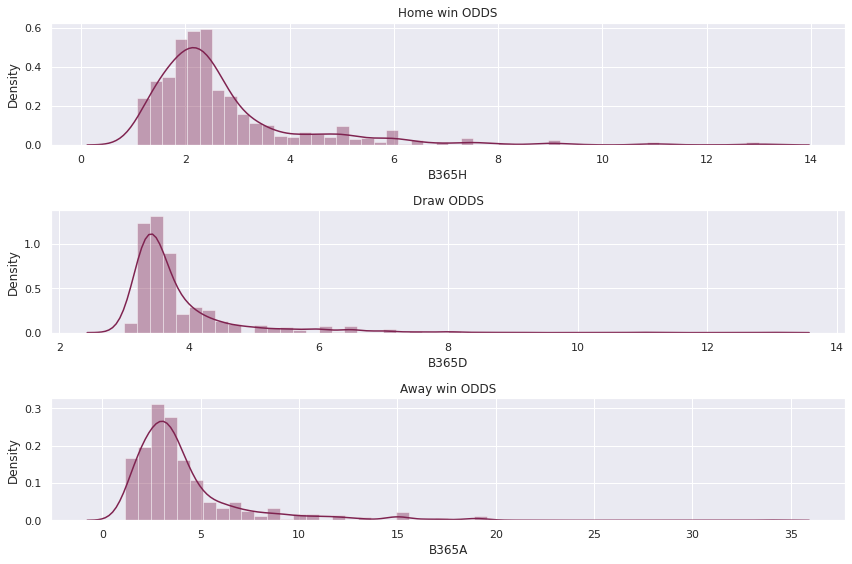

In [27]:
# distribution of odds in home wins
##
fig, ax = plt.subplots(3,1, figsize=(12,8))
sns.distplot(draws['B365H'], ax=ax[0])
ax[0].set_title("Home win ODDS")

sns.distplot(draws['B365D'], ax=ax[1])
ax[1].set_title("Draw ODDS")

sns.distplot(draws['B365A'], ax=ax[2])
ax[2].set_title("Away win ODDS")

plt.tight_layout()

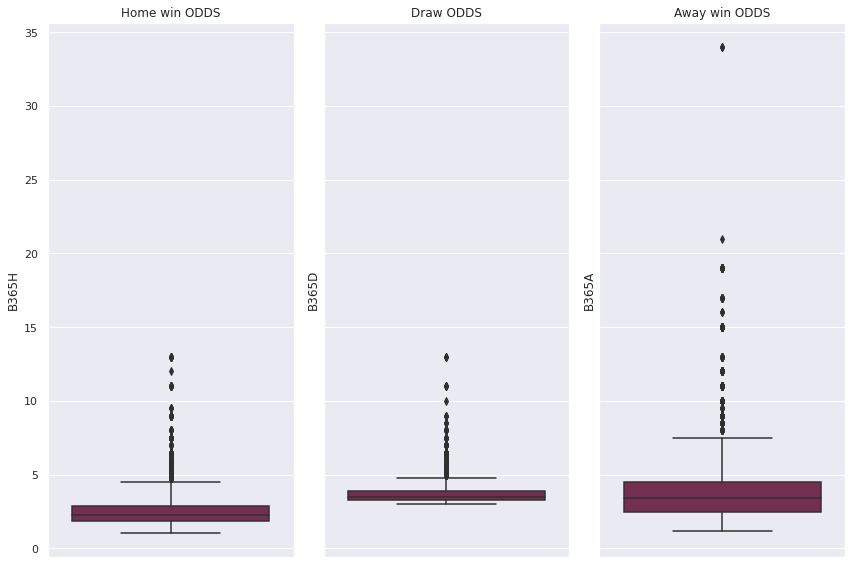

In [28]:
# boxplots
##
fig, ax = plt.subplots(1,3, sharey=True, figsize=(12,8))
sns.boxplot(y=draws['B365H'], ax=ax[0])
ax[0].set_title("Home win ODDS")

sns.boxplot(y=draws['B365D'], ax=ax[1])
ax[1].set_title("Draw ODDS")

sns.boxplot(y=draws['B365A'], ax=ax[2])
ax[2].set_title("Away win ODDS")

plt.tight_layout()

Draws seem to be so unpredictable. For one, it's box plot is not the lowest.  
Also, distribution of draws and away wins are very alike. Even by looking at the boxplots statistics we can see that the medians of the two are close(maybe almost equal). The only big distinguisher is their inter-quatile range.  
So our model might actually mistake a draw for an away win or vice versa.

In [29]:
# draw odds that are not the least of the three
##
draws[(draws.B365D >= draws.B365H) | (draws.B365D >= draws.B365A)]

,Date,HomeTeam,AwayTeam,HomeTeam_n,AwayTeam_n,B365H,B365D,B365A,result
4,2010-02-10,Sunderland,Man United,5.0,1.0,5.00,3.50,1.75,Draw
6,2010-02-10,West Brom,Bolton,21.0,3.0,2.10,3.25,3.75,Draw
7,2010-02-10,West Ham,Fulham,11.0,29.0,2.25,3.25,3.30,Draw
9,2010-02-10,West Ham,Fulham,11.0,29.0,2.25,3.25,3.30,Draw
10,2010-02-10,West Ham,Fulham,11.0,29.0,2.25,3.25,3.30,Draw
...,...,...,...,...,...,...,...,...,...
11673,2021-02-01,Brighton,Wolves,9.0,17.0,2.62,3.25,2.75,Draw
11690,2021-06-02,Man United,Everton,1.0,14.0,1.53,4.20,6.00,Draw
11691,2021-06-02,Fulham,West Ham,29.0,11.0,3.60,3.50,2.05,Draw
11693,2021-06-02,Burnley,Brighton,7.0,9.0,3.60,3.10,2.20,Draw


In [30]:
936 / len(df) * 100

7.997949243783645

Draw wins where draw odds awarded were not the least cover 8% of our dataframe.  
Looking at these draw odds, many can be calculated by (home odd + away odd) / 2 . If that's not exact, then it's close. You can go ahead and pick a row, do the math and you'll see that it applies in most cases.  
Working with this calculation we can actually come up with a feature that we're going to pertake(at the back of our mind) as the supposed draw odd.  
(out of options for new features for now because draws are the most unpredictable)

In [31]:
df['home_away_mean'] = (df.B365H + df.B365A ) / 2

display(df.head(3))

<ipython-input-31-b3e0743253e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_away_mean'] = (df.B365H + df.B365A ) / 2


,Date,HomeTeam,AwayTeam,HomeTeam_n,AwayTeam_n,B365H,B365D,B365A,result,draw_less_home,mean_odd,home_away_mean
0,2010-01-11,Blackpool,West Brom,12.0,21.0,2.9,3.25,2.5,Home Win,0.35,2.883333,2.7
1,2010-01-11,Blackpool,West Brom,12.0,21.0,2.9,3.25,2.5,Home Win,0.35,2.883333,2.7
2,2010-01-11,Blackpool,West Brom,12.0,21.0,2.9,3.25,2.5,Home Win,0.35,2.883333,2.7


# Away wins

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

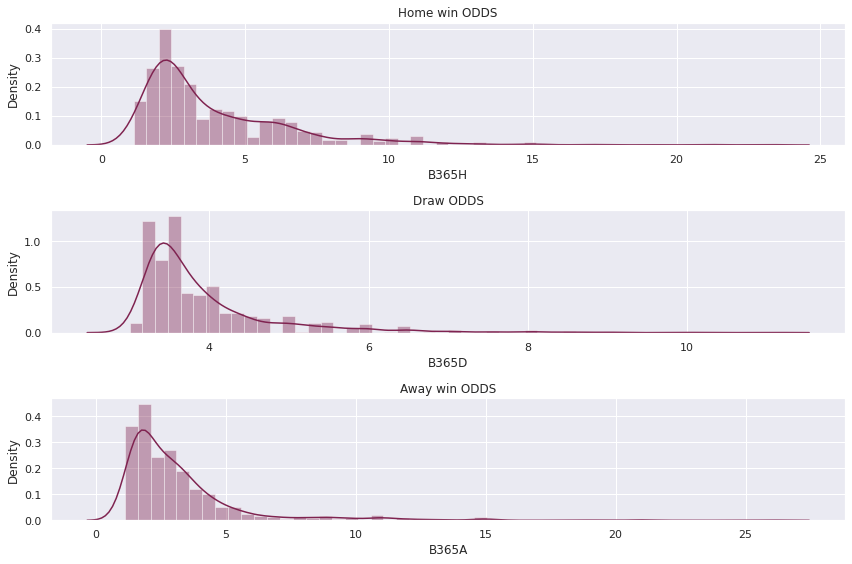

In [32]:
# distribution of odds in home wins
##
fig, ax = plt.subplots(3,1, figsize=(12,8))
sns.distplot(awaywins['B365H'], ax=ax[0])
ax[0].set_title("Home win ODDS")

sns.distplot(awaywins['B365D'], ax=ax[1])
ax[1].set_title("Draw ODDS")

sns.distplot(awaywins['B365A'], ax=ax[2])
ax[2].set_title("Away win ODDS")

plt.tight_layout()

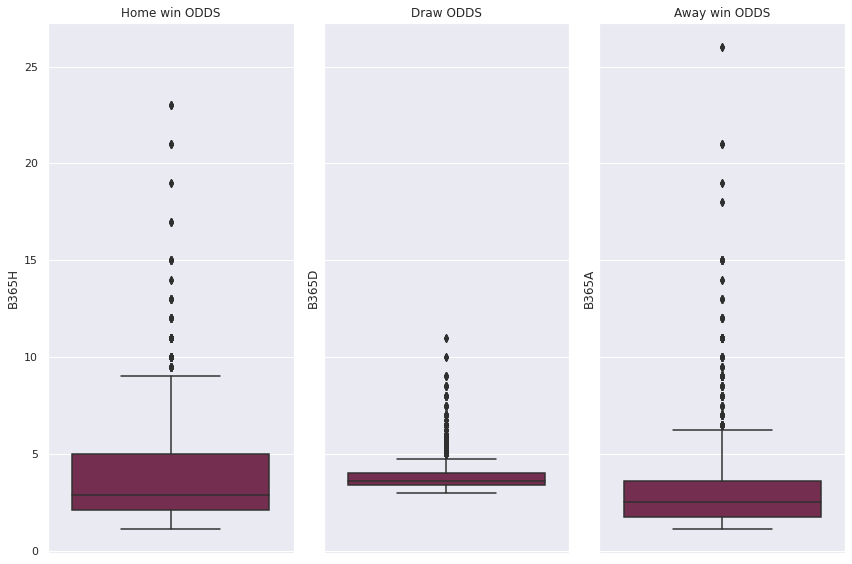

In [33]:
# boxplots
##
fig, ax = plt.subplots(1,3, sharey=True, figsize=(12,8))
sns.boxplot(y=awaywins['B365H'], ax=ax[0])
ax[0].set_title("Home win ODDS")

sns.boxplot(y=awaywins['B365D'], ax=ax[1])
ax[1].set_title("Draw ODDS")

sns.boxplot(y=awaywins['B365A'], ax=ax[2])
ax[2].set_title("Away win ODDS")

plt.tight_layout()

Away wins are a little predictable. Even though not the whole box is the lowest, the median is the lowest but it is also close to that of home wins.  
This makes sense since probability of a team to win while at home is higher but there is no certainty of a team winning while it is away(we cannot randomly say a team is likely to win because it is away but we can randomly say a team is likely to win because it's at home).

In [34]:
# away wins whose odds were not the least
##
awaywins[(awaywins.B365A >= awaywins.B365D) | (awaywins.B365A >= awaywins.B365H)]

,Date,HomeTeam,AwayTeam,HomeTeam_n,AwayTeam_n,B365H,B365D,B365A,result
25,2010-03-10,Liverpool,Blackpool,30.0,12.0,1.33,5.00,10.00,Away Win
28,2010-03-10,Liverpool,Blackpool,30.0,12.0,1.33,5.00,10.00,Away Win
31,2010-03-10,Liverpool,Blackpool,30.0,12.0,1.33,5.00,10.00,Away Win
81,2010-07-11,Arsenal,Newcastle,23.0,32.0,1.29,5.50,11.00,Away Win
84,2010-07-11,Arsenal,Newcastle,23.0,32.0,1.29,5.50,11.00,Away Win
...,...,...,...,...,...,...,...,...,...
11670,2021-01-31,Leicester,Leeds,16.0,37.0,1.80,4.00,4.20,Away Win
11685,2021-03-02,Leeds,Everton,37.0,14.0,2.50,3.50,2.70,Away Win
11686,2021-03-02,Aston Villa,West Ham,25.0,11.0,2.20,3.40,3.25,Away Win
11687,2021-03-02,Liverpool,Brighton,30.0,9.0,1.33,5.25,9.00,Away Win


In [35]:
517 / len(df) * 100

4.417670682730924

Away wins whose odds were not the least of the three cover 4.41%  
Doing the same as we did for such home wins: new feature that holds draw odd - away odd

In [36]:
df['draw_less_away'] = df.B365D - df.B365A

display(df.head(3))

<ipython-input-36-b1875e63df0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['draw_less_away'] = df.B365D - df.B365A


,Date,HomeTeam,AwayTeam,HomeTeam_n,AwayTeam_n,B365H,B365D,B365A,result,draw_less_home,mean_odd,home_away_mean,draw_less_away
0,2010-01-11,Blackpool,West Brom,12.0,21.0,2.9,3.25,2.5,Home Win,0.35,2.883333,2.7,0.75
1,2010-01-11,Blackpool,West Brom,12.0,21.0,2.9,3.25,2.5,Home Win,0.35,2.883333,2.7,0.75
2,2010-01-11,Blackpool,West Brom,12.0,21.0,2.9,3.25,2.5,Home Win,0.35,2.883333,2.7,0.75


In [37]:
# away wins whose odds were equal to draw or home
##
awaywins[(awaywins.B365A == awaywins.B365D) | (awaywins.B365A == awaywins.B365H)]

,Date,HomeTeam,AwayTeam,HomeTeam_n,AwayTeam_n,B365H,B365D,B365A,result
517,2010-12-26,Blackburn,Stoke,33.0,15.0,2.30,3.20,3.20,Away Win
527,2010-12-26,Blackburn,Stoke,33.0,15.0,2.30,3.20,3.20,Away Win
534,2010-12-26,Blackburn,Stoke,33.0,15.0,2.30,3.20,3.20,Away Win
867,2011-04-01,Blackpool,Birmingham,12.0,20.0,2.30,3.25,3.25,Away Win
869,2011-04-01,Blackpool,Birmingham,12.0,20.0,2.30,3.25,3.25,Away Win
...,...,...,...,...,...,...,...,...,...
11580,2020-12-09,West Ham,Newcastle,11.0,32.0,2.15,3.40,3.40,Away Win
11581,2020-12-09,West Ham,Newcastle,11.0,32.0,2.15,3.40,3.40,Away Win
11587,2020-12-12,Wolves,Aston Villa,17.0,25.0,2.25,3.25,3.25,Away Win
11634,2021-01-01,Everton,West Ham,14.0,11.0,2.10,3.50,3.50,Away Win


Remedy for the issue above is covered by the mean_odd feature we designed

---
Adding two new features that hold number of days after the last/previous play as home team or as away team.

In [38]:
df['days_since_homeplay'] = df.groupby('HomeTeam')['Date'].diff()

df['days_since_awayplay'] = df.groupby('AwayTeam')['Date'].diff()

<ipython-input-38-64d94c0f45cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_homeplay'] = df.groupby('HomeTeam')['Date'].diff()
<ipython-input-38-64d94c0f45cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_awayplay'] = df.groupby('AwayTeam')['Date'].diff()


In [39]:
df.head()

,Date,HomeTeam,AwayTeam,HomeTeam_n,AwayTeam_n,B365H,B365D,B365A,result,draw_less_home,mean_odd,home_away_mean,draw_less_away,days_since_homeplay,days_since_awayplay
0,2010-01-11,Blackpool,West Brom,12.0,21.0,2.90,3.25,2.50,Home Win,0.35,2.883333,2.700,0.75,NaT,NaT
1,2010-01-11,Blackpool,West Brom,12.0,21.0,2.90,3.25,2.50,Home Win,0.35,2.883333,2.700,0.75,0 days,0 days
2,2010-01-11,Blackpool,West Brom,12.0,21.0,2.90,3.25,2.50,Home Win,0.35,2.883333,2.700,0.75,0 days,0 days
3,2010-02-10,Birmingham,Everton,20.0,14.0,2.88,3.10,2.63,Away Win,0.22,2.870000,2.755,0.47,NaT,NaT
4,2010-02-10,Sunderland,Man United,5.0,1.0,5.00,3.50,1.75,Draw,-1.50,3.416667,3.375,1.75,NaT,NaT


In [40]:
# filling the NaTs with zeros
##
df.fillna(pd.Timedelta(seconds=0), inplace=True)

display(df.head(3))

/usr/lib/python3/dist-packages/pandas/core/frame.py:4321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,Date,HomeTeam,AwayTeam,HomeTeam_n,AwayTeam_n,B365H,B365D,B365A,result,draw_less_home,mean_odd,home_away_mean,draw_less_away,days_since_homeplay,days_since_awayplay
0,2010-01-11,Blackpool,West Brom,12.0,21.0,2.9,3.25,2.5,Home Win,0.35,2.883333,2.7,0.75,0 days,0 days
1,2010-01-11,Blackpool,West Brom,12.0,21.0,2.9,3.25,2.5,Home Win,0.35,2.883333,2.7,0.75,0 days,0 days
2,2010-01-11,Blackpool,West Brom,12.0,21.0,2.9,3.25,2.5,Home Win,0.35,2.883333,2.7,0.75,0 days,0 days


In [41]:
# retaining only the figure
##
df.days_since_homeplay = df.days_since_homeplay.apply(lambda tm: tm.days)

df.days_since_awayplay = df.days_since_awayplay.apply(lambda tm: tm.days)

/usr/lib/python3/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [42]:
df.head()

,Date,HomeTeam,AwayTeam,HomeTeam_n,AwayTeam_n,B365H,B365D,B365A,result,draw_less_home,mean_odd,home_away_mean,draw_less_away,days_since_homeplay,days_since_awayplay
0,2010-01-11,Blackpool,West Brom,12.0,21.0,2.90,3.25,2.50,Home Win,0.35,2.883333,2.700,0.75,0,0
1,2010-01-11,Blackpool,West Brom,12.0,21.0,2.90,3.25,2.50,Home Win,0.35,2.883333,2.700,0.75,0,0
2,2010-01-11,Blackpool,West Brom,12.0,21.0,2.90,3.25,2.50,Home Win,0.35,2.883333,2.700,0.75,0,0
3,2010-02-10,Birmingham,Everton,20.0,14.0,2.88,3.10,2.63,Away Win,0.22,2.870000,2.755,0.47,0,0
4,2010-02-10,Sunderland,Man United,5.0,1.0,5.00,3.50,1.75,Draw,-1.50,3.416667,3.375,1.75,0,0


## Design feature; days_since_h2h
The no. of days since the two teams played head to head (this will take care of only the same setting; home team by then has to be the home team by now)

In [43]:
df['home_away'] = df.HomeTeam +"_"+ df.AwayTeam
df['days_since_h2h'] = df.groupby('home_away')['Date'].diff()
# drop 'home_away' , we don't need it
df.drop('home_away', axis=1, inplace=True)

# same treatment of NaTs as above
df.fillna(pd.Timedelta(seconds=0), inplace=True)
df.days_since_h2h = df.days_since_h2h.apply(lambda tm: tm.days)

df.head()

<ipython-input-43-947a35b69e8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_away'] = df.HomeTeam +"_"+ df.AwayTeam
<ipython-input-43-947a35b69e8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_h2h'] = df.groupby('home_away')['Date'].diff()
/usr/lib/python3/dist-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,Date,HomeTeam,AwayTeam,HomeTeam_n,AwayTeam_n,B365H,B365D,B365A,result,draw_less_home,mean_odd,home_away_mean,draw_less_away,days_since_homeplay,days_since_awayplay,days_since_h2h
0,2010-01-11,Blackpool,West Brom,12.0,21.0,2.90,3.25,2.50,Home Win,0.35,2.883333,2.700,0.75,0,0,0
1,2010-01-11,Blackpool,West Brom,12.0,21.0,2.90,3.25,2.50,Home Win,0.35,2.883333,2.700,0.75,0,0,0
2,2010-01-11,Blackpool,West Brom,12.0,21.0,2.90,3.25,2.50,Home Win,0.35,2.883333,2.700,0.75,0,0,0
3,2010-02-10,Birmingham,Everton,20.0,14.0,2.88,3.10,2.63,Away Win,0.22,2.870000,2.755,0.47,0,0,0
4,2010-02-10,Sunderland,Man United,5.0,1.0,5.00,3.50,1.75,Draw,-1.50,3.416667,3.375,1.75,0,0,0


In [44]:
df.days_since_h2h.value_counts()

0       8739
364       23
238       22
371       21
336       19
        ... 
2109       1
68         1
124        1
172        1
1771       1
Name: days_since_h2h, Length: 951, dtype: int64

In [45]:
# saving dataframe
##
#df.to_csv("../csv files/df_features.csv", index=False)